In [2]:
#Importing libraries and loading dataset
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime


dataset = pd.read_csv('preprocessed_dataset_china_.csv')                            

In [3]:
dataset.head()

,date_and_time,PM2.5,O3,TEMPERATURE,PRESSURE,DEWPOINT,RAIN
0,2013-03-01 00:00:00,-0.880177,0.104015,-1.186727,0.984646,-1.575110,-0.081435
1,2013-03-01 01:00:00,-0.856848,0.174137,-1.221805,1.031867,-1.596879,-0.081435
2,2013-03-01 02:00:00,-0.891841,0.051423,-1.265652,1.050755,-1.625904,-0.081435
3,2013-03-01 04:00:00,-0.891841,-0.351782,-1.291961,1.192416,-1.771031,-0.081435
4,2013-03-01 05:00:00,-0.868512,0.139076,-1.353348,1.249081,-1.727493,-0.081435


In [4]:
# # Data cleaning
# dataset.drop('No', axis=1, inplace=True)
# dataset.columns = col_names
# dataset['pollution'].fillna(0, inplace=True)
# dataset = dataset[24:] # drop the first day
# print(dataset.head(5))
# dataset.to_csv('pollution.csv') # save new CSV

In [5]:
# load dataset
df = pd.read_csv('preprocessed_dataset_china_.csv', header=0, index_col=0)
df.describe()

,PM2.5,O3,TEMPERATURE,PRESSURE,DEWPOINT,RAIN
count,3.366300e+04,3.366300e+04,3.366300e+04,3.366300e+04,3.366300e+04,3.366300e+04
mean,-5.065807e-18,3.377205e-17,-5.065807e-17,-3.039484e-17,-6.754409e-18,1.561957e-17
std,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00
min,-9.501615e-01,-9.791296e-01,-2.686312e+00,-2.490773e+00,-2.757895e+00,-8.143520e-02
25%,-7.285426e-01,-8.426395e-01,-9.148722e-01,-8.191717e-01,-8.204488e-01,-8.143520e-02
50%,-2.969689e-01,-2.465980e-01,9.362097e-02,-5.420168e-02,5.031356e-02,-8.143520e-02
75%,3.562238e-01,4.546275e-01,8.565680e-01,8.052091e-01,9.138196e-01,-8.143520e-02
max,1.066734e+01,5.293083e+00,2.347384e+00,2.882905e+00,1.871658e+00,5.903680e+01


In [6]:
dataset_columns = df.columns.tolist()
dataset_columns

['PM2.5', 'O3', 'TEMPERATURE', 'PRESSURE', 'DEWPOINT', 'RAIN']

<Axes: >

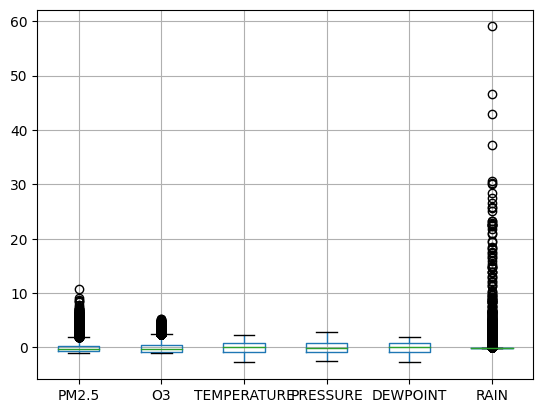

In [7]:
#Box plot
#pd.options.display.mpl_style = False
df.boxplot()

In [6]:
df

,PM2.5,O3,TEMPERATURE,PRESSURE,DEWPOINT,RAIN
date_and_time,,,,,,
2013-03-01 00:00:00,-0.880177,0.104015,-1.186727,0.984646,-1.575110,-0.081435
2013-03-01 01:00:00,-0.856848,0.174137,-1.221805,1.031867,-1.596879,-0.081435
2013-03-01 02:00:00,-0.891841,0.051423,-1.265652,1.050755,-1.625904,-0.081435
2013-03-01 04:00:00,-0.891841,-0.351782,-1.291961,1.192416,-1.771031,-0.081435
2013-03-01 05:00:00,-0.868512,0.139076,-1.353348,1.249081,-1.727493,-0.081435
...,...,...,...,...,...,...
2017-02-28 19:00:00,-0.856848,0.279321,-0.116847,0.191344,-1.371932,-0.081435
2017-02-28 20:00:00,-0.833520,-0.106353,-0.195773,0.200788,-1.292112,-0.081435
2017-02-28 21:00:00,-0.821856,-0.036230,-0.265929,0.257453,-1.161497,-0.081435


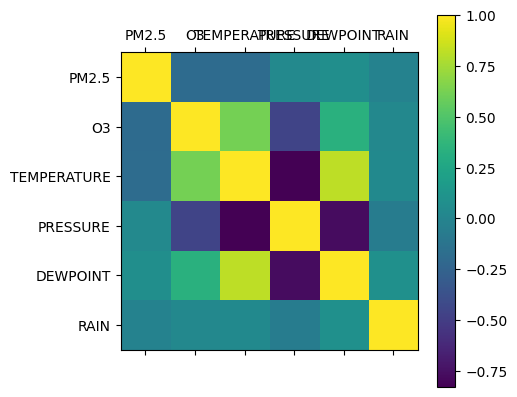

In [8]:
#Analysing relationship between different features
# cor_cols = ['pollution', 'wnd_spd', 'rain', 'snow', 'temp']
cor_cols = dataset_columns
plt.matshow(df.corr())
plt.xticks(range(len(cor_cols)), cor_cols)
plt.yticks(range(len(cor_cols)), cor_cols)
plt.colorbar()
plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder

# Encode non categorical values
values = df.values
encoder = LabelEncoder()
values[:,1] = encoder.fit_transform(values[:,1])
values = values.astype('float32')
values[:,1]

array([304., 316., 292., ..., 265., 292., 239.], dtype=float32)

In [10]:
#Normalising data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_dataset = scaler.fit_transform(values)

In [11]:
#Creating a window for previous data
def to_supervised(train):
  window_size = 4
  X = []
  Y = []
  for i in range(window_size, len(train)):
    X.append(train[i-window_size:i,:])
    Y.append(train[i,0:1])
    
  return X,Y

In [12]:
X, Y = to_supervised(scaled_dataset)
X = np.array(X)
Y = np.array(Y)
print('Y' ,Y.shape)
print('X' ,X.shape)


Y (33659, 1)
X (33659, 4, 6)


In [13]:
# #Splitting the dataset
# n_train = 24*365
# X_train, X_test = X[n_train:,] , X[:n_train,]
# print('X_train' ,X_train.shape)
# print('X_test' ,X_test.shape)

# Y_train, Y_test = Y[n_train:,] , Y[:n_train,]
# print('Y_train' ,Y_train.shape)
# print('Y_test' ,Y_test.shape)

In [14]:
# Define training size and validation size
n_train = 24 * 365   # For example, 1 year of data for training
n_val = int(n_train * 0.2)  # Use 20% of the training data for validation (you can adjust the ratio)

# Split the data
X_train, X_test = X[n_train:,], X[:n_train,]
Y_train, Y_test = Y[n_train:,], Y[:n_train,]

# Further split the training data into training and validation sets
X_val, X_train = X_train[:n_val,], X_train[n_val:,]
Y_val, Y_train = Y_train[:n_val,], Y_train[n_val:,]

# Print the shapes to verify
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('X_val', X_val.shape)

print('Y_train', Y_train.shape)
print('Y_test', Y_test.shape)
print('Y_val', Y_val.shape)

X_train (23147, 4, 6)
X_test (8760, 4, 6)
X_val (1752, 4, 6)
Y_train (23147, 1)
Y_test (8760, 1)
Y_val (1752, 1)


In [15]:
# #Importing LSTM model
# from keras.models import Sequential
# from keras.layers import Dense, Dropout,LSTM
# model = Sequential()

# model.add(LSTM(units = 50, return_sequences = True, input_shape=(X_train.shape[1], X_train.shape[2])))
# model.add(Dropout(0.2))

# model.add(LSTM(units = 50, return_sequences = True))
# model.add(Dropout(0.2))

# model.add(LSTM(units = 50))
# model.add(Dropout(0.2))

# model.add(Dense(units = 1))

# model.compile(optimizer = 'adam', loss = 'mean_squared_error')         

In [16]:
# import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
import keras_tuner as kt
import numpy as np

# Ensure n_steps and n_features are defined
n_steps = X_train.shape[1]  # Define number of time steps
n_features = 6  # Example feature count (update accordingly)

# Define hyperparameter tuning function
def build_model(hp):
    model = Sequential()
    
    # Single LSTM layer with tuning of units
    model.add(LSTM(
        units=hp.Choice('units', [8, 16, 32, 64, 128]),  # Tuning hidden units
        activation='relu',
        input_shape=(n_steps, n_features)
    ))
    
    # Dropout layer with tuning of dropout rate
    model.add(Dropout(hp.Choice('dropout', [0.2, 0.3, 0.4])))  # Tuning dropout rate
    
    # Output layer
    model.add(Dense(1))  # Regression output
    
    # Optimizer Selection with different learning rates
    optimizer_choice = hp.Choice('optimizer', ['SGD', 'Adam', 'RMSprop'])  # Tuning optimizer
    
    if optimizer_choice == 'SGD':
        optimizer = SGD(
            learning_rate=hp.Choice('sgd_lr', [0.01, 0.005, 0.001, 0.0005]),  # Tuning SGD learning rate
            momentum=0.9, nesterov=True
        )
    elif optimizer_choice == 'Adam':
        optimizer = Adam(
            learning_rate=hp.Choice('adam_lr', [0.001, 0.0005, 0.0001, 0.00005])  # Tuning Adam learning rate
        )
    else:  # RMSprop
        optimizer = RMSprop(
            learning_rate=hp.Choice('rmsprop_lr', [0.001, 0.0005, 0.0001, 0.00005]),  # Tuning RMSprop learning rate
            rho=0.9
        )
    
    # Compile the model
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    
    return model

# Initialize Keras Tuner
tuner = kt.RandomSearch(
    build_model,
    objective='loss',  # Tuning for minimum loss
    max_trials=10,  # Number of trials for hyperparameter search
    executions_per_trial=1,  # Number of times each trial is executed
    directory='kt_tuning',  # Directory for storing tuning results
    project_name='lstm_aqi_tuning_v2'  # Project name for storing results
)

# Perform Hyperparameter Search (ensure you have validation data like X_split_val, y_split_val)
tuner.search(X_train, Y_train, epochs=50, validation_data=(X_val, Y_val), batch_size=32)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Output the best hyperparameters
print(f"""
Best LSTM units: {best_hps.get('units')}
Best Dropout Rate: {best_hps.get('dropout')}
Best Optimizer: {best_hps.get('optimizer')}
Best Learning Rate: {best_hps.get('sgd_lr' if best_hps.get('optimizer') == 'SGD' else 'adam_lr' if best_hps.get('optimizer') == 'Adam' else 'rmsprop_lr')}
""")

best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train, Y_train, epochs=50, validation_data=(X_val, Y_val), batch_size=32)

Reloading Tuner from kt_tuning\lstm_aqi_tuning_v2\tuner0.json

Best LSTM units: 128
Best Dropout Rate: 0.2
Best Optimizer: Adam
Best Learning Rate: 0.0005

Epoch 1/50
724/724 [==============================] - 6s 6ms/step - loss: 0.1973 - mae: 0.2595 - val_loss: 0.0528 - val_mae: 0.1448
Epoch 2/50
724/724 [==============================] - 4s 5ms/step - loss: 0.0976 - mae: 0.1864 - val_loss: 0.0461 - val_mae: 0.1371
Epoch 3/50
724/724 [==============================] - 4s 6ms/step - loss: 0.0862 - mae: 0.1723 - val_loss: 0.0400 - val_mae: 0.1173
Epoch 4/50
724/724 [==============================] - 4s 5ms/step - loss: 0.0814 - mae: 0.1651 - val_loss: 0.0407 - val_mae: 0.1209
Epoch 5/50
724/724 [==============================] - 4s 5ms/step - loss: 0.0757 - mae: 0.1604 - val_loss: 0.0386 - val_mae: 0.1137
Epoch 6/50
724/724 [==============================] - 4s 6ms/step - loss: 0.0741 - mae: 0.1572 - val_loss: 0.0384 - val_mae: 0.1109
Epoch 7/50
724/724 [==============================] 

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Perform Predictions
y_pred = best_model.predict(X_test)

# Compute MSE, MAE, RMSE
mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
rmse = np.sqrt(mse)

print(f"RMSE: {rmse}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

274/274 [==============================] - 1s 2ms/step
RMSE: 0.2575296461582184
MSE: 0.06632152199745178
MAE: 0.14680802822113037
R²: 0.933249053640202


In [18]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_mse, cv_mae, cv_rmse = [], [], []

for train_idx, val_idx in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
    y_train_fold, y_val_fold = Y_train[train_idx], Y_train[val_idx]

    # Train model on fold
    fold_model = tuner.hypermodel.build(best_hps)
    fold_model.fit(X_train_fold, y_train_fold, epochs=50, batch_size=32, verbose=0)

    # Predict
    y_val_pred = fold_model.predict(X_val_fold)

    # Compute Metrics
    fold_mse = mean_squared_error(y_val_fold, y_val_pred)
    fold_mae = mean_absolute_error(y_val_fold, y_val_pred)
    fold_rmse = np.sqrt(fold_mse)

    cv_mse.append(fold_mse)
    cv_mae.append(fold_mae)
    cv_rmse.append(fold_rmse)

# Print Cross Validation Results
# print(f"Cross-Validation MSE: {np.mean(cv_mse)} ± {np.std(cv_mse)}")
# print(f"Cross-Validation MAE: {np.mean(cv_mae)} ± {np.std(cv_mae)}")
# print(f"Cross-Validation RMSE: {np.mean(cv_rmse)} ± {np.std(cv_rmse)}")

print(f"Cross-Validation MSE: {np.mean(cv_mse)} (std: {np.std(cv_mse)})")
print(f"Cross-Validation MAE: {np.mean(cv_mae)} (std: {np.std(cv_mae)})")
print(f"Cross-Validation RMSE: {np.mean(cv_rmse)} (std: {np.std(cv_rmse)})")


145/145 [==============================] - 1s 3ms/step
Cross-Validation MSE: 0.05575935170054436 (std: 0.006276457104831934)
Cross-Validation MAE: 0.12622752785682678 (std: 0.0016928391996771097)
Cross-Validation RMSE: 0.235782191157341 (std: 0.01288832537829876)


In [19]:
# #Taking predictions
# from keras.models import load_model
# model.save('AirPollutionMultivariate.h5')

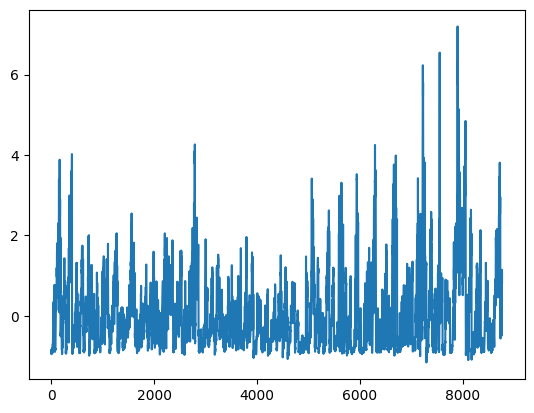

In [20]:
plt.plot(y_pred)

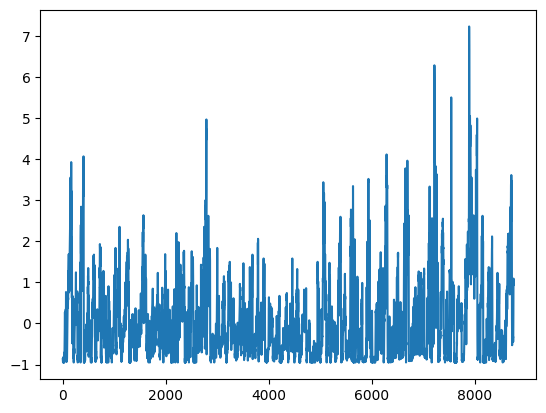

In [21]:
plt.plot(Y_test)

In [22]:
_, train_acc = best_model.evaluate(X_train, Y_train, verbose=0)
_, test_acc = best_model.evaluate(X_test, Y_test, verbose=0)
print('Train: %.5f, Test: %.5f' % (train_acc, test_acc))

Train: 0.11824, Test: 0.14681


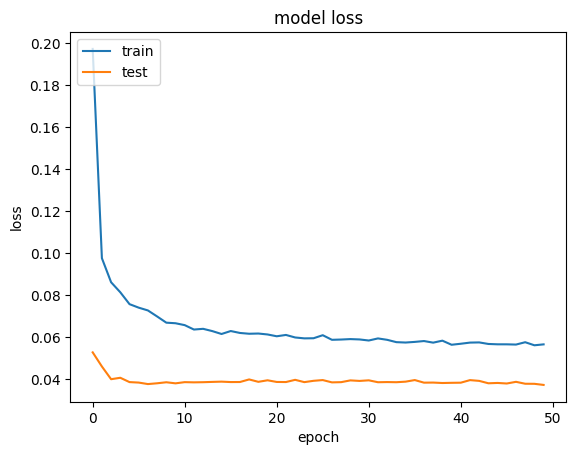

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch-wise validation loss:
Epoch 1: 0.052797265350818634
Epoch 2: 0.04607466235756874
Epoch 3: 0.040020667016506195
Epoch 4: 0.04070111736655235
Epoch 5: 0.038642968982458115
Epoch 6: 0.03841456398367882
Epoch 7: 0.037702951580286026
Epoch 8: 0.038078803569078445
Epoch 9: 0.038563698530197144
Epoch 10: 0.0380505807697773
Epoch 11: 0.03862087056040764
Epoch 12: 0.03852367401123047
Epoch 13: 0.038594476878643036
Epoch 14: 0.03873632475733757
Epoch 15: 0.0388609804213047
Epoch 16: 0.03866022825241089
Epoch 17: 0.03868548944592476
Epoch 18: 0.0399102084338665
Epoch 19: 0.038771577179431915
Epoch 20: 0.03950420767068863
Epoch 21: 0.03871176019310951
Epoch 22: 0.03867005929350853
Epoch 23: 0.0397222526371479
Epoch 24: 0.03862569108605385
Epoch 25: 0.0392567440867424
Epoch 26: 0.03960694372653961
Epoch 27: 0.03851119056344032
Epoch 28: 0.03861530125141144
Epoch 29: 0.03945533186197281
Epoch 30: 0.03920208662748337
Epoch 31: 0.0394870862364769
Epoch 32: 0.038580164313316345
Epoch 33: 0.038660

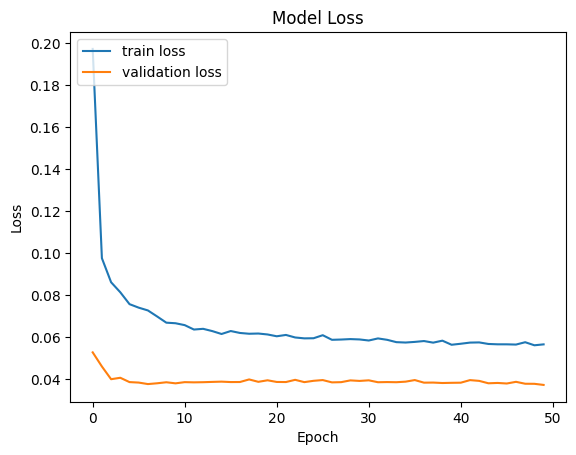

In [24]:
# Print validation loss at each epoch
print("Epoch-wise validation loss:")
for epoch, val_loss in enumerate(history.history['val_loss']):
    print(f"Epoch {epoch+1}: {val_loss}")

# Plotting the loss graph
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


In [21]:
from numpy import array
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X),array(y)

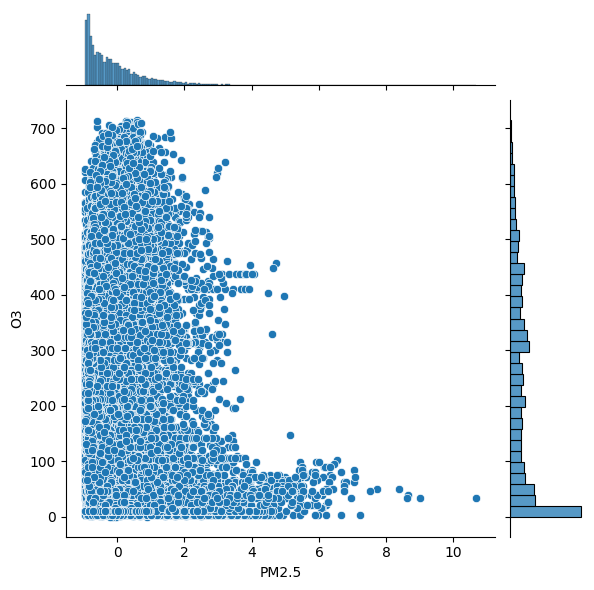

In [25]:
import seaborn as sns
sns.jointplot(x=df['PM2.5'], y=df['O3'], data = df)

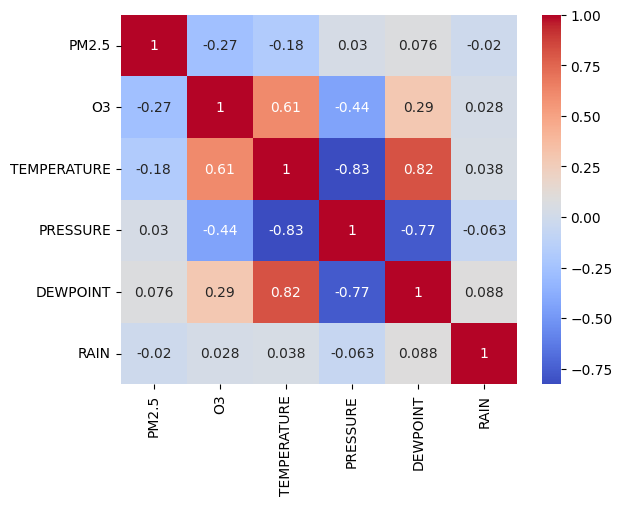

In [26]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

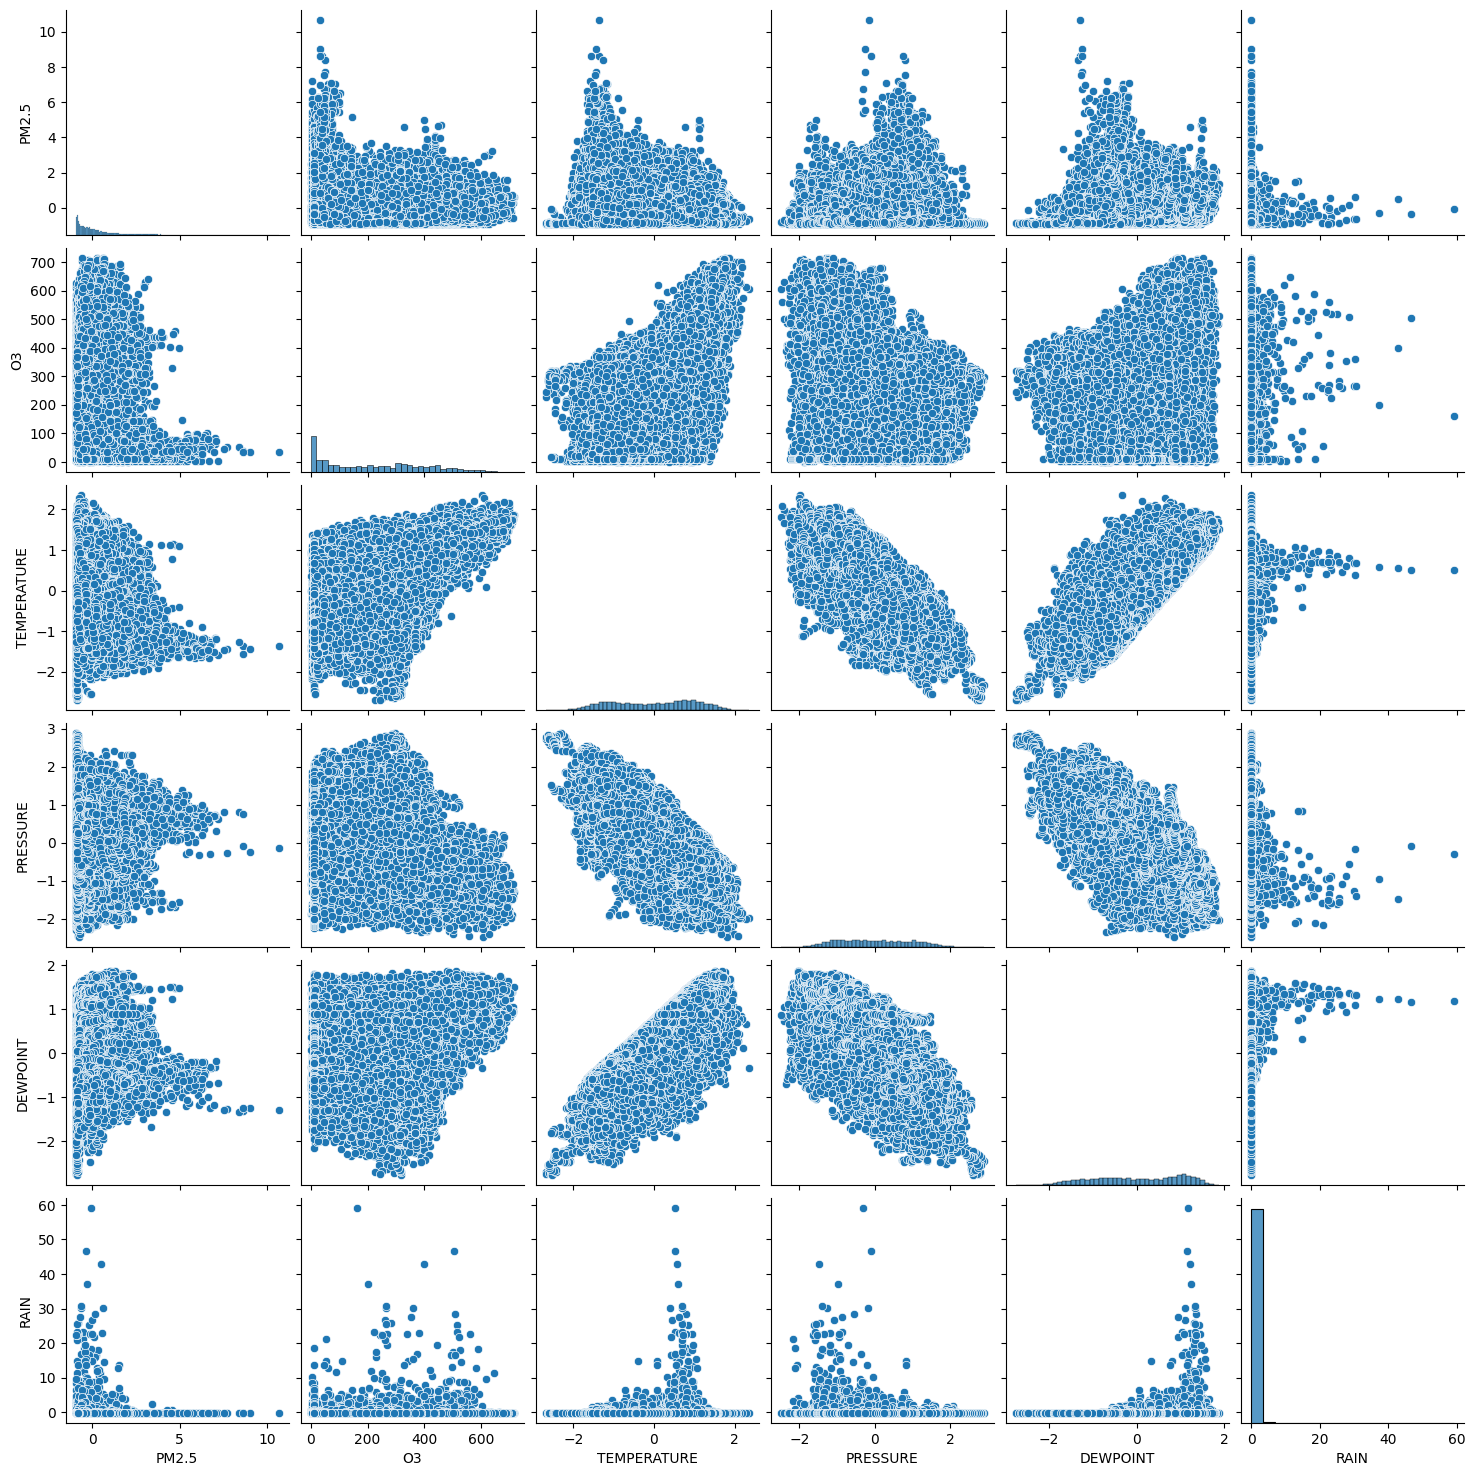

In [27]:
g = sns.pairplot(df)

<Axes: xlabel='PM2.5', ylabel='O3'>

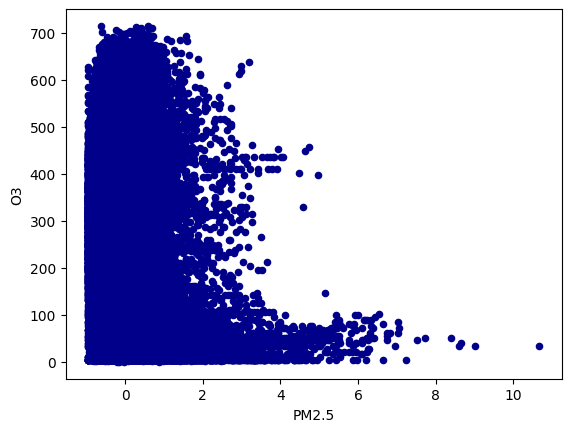

In [29]:
df.plot.scatter(x='PM2.5', y='O3', c='DarkBlue')

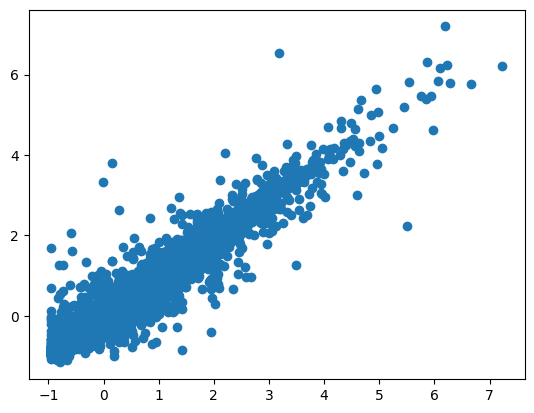

In [30]:
plt.scatter(Y_test, y_pred)

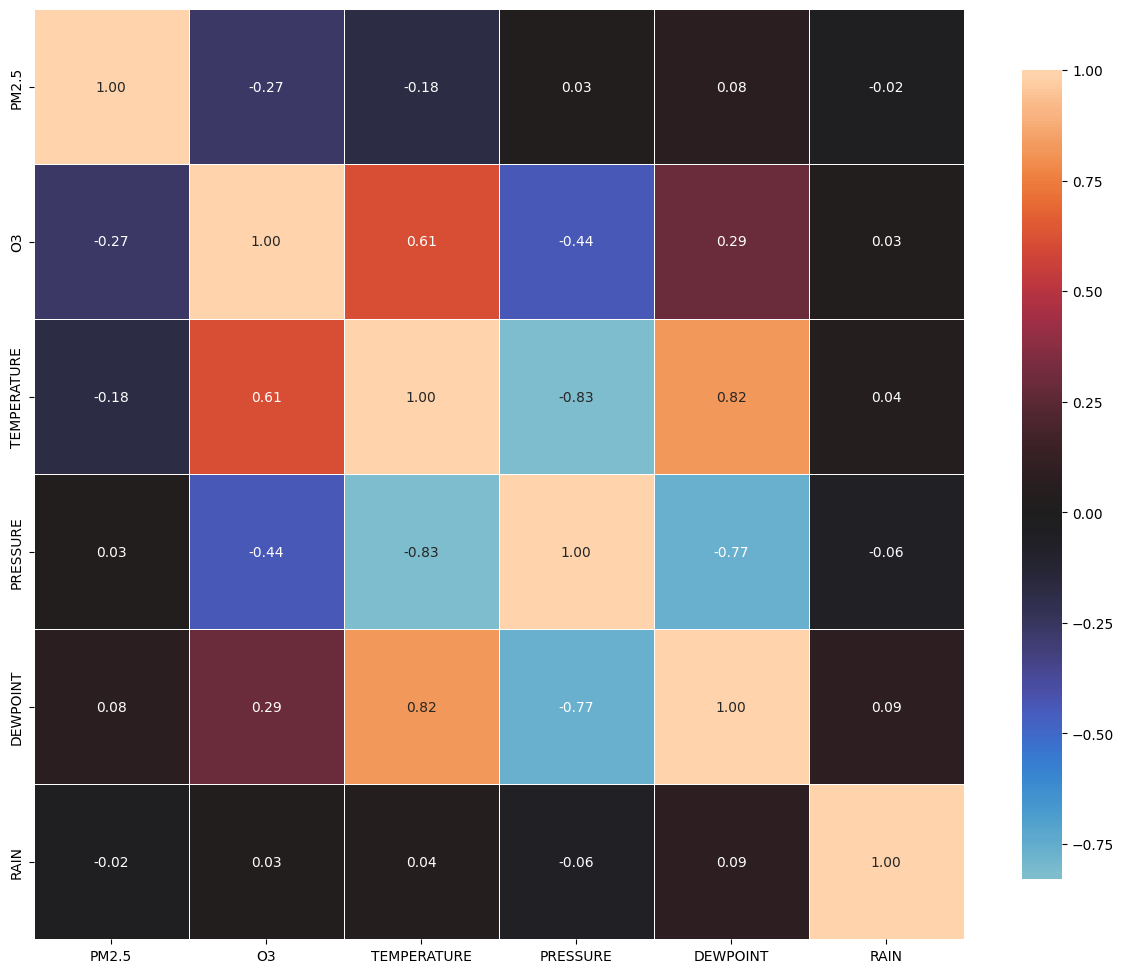

In [31]:
correlations = df.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
plt.show();